In [1]:
from typing import Dict, List, Optional, Tuple

import matplotlib.pyplot as plt
from matplotlib.pyplot import Axes
import numpy as np
import pathlib
from utils import read_json, write_json
from collections import defaultdict
import statistics

from constants import RFID_DATA_FOLDER


In [2]:
automated_testing_folder: pathlib.Path = RFID_DATA_FOLDER / "automated_test"
time_str_tested: pathlib.Path = "20220430-210104"
# data_folder: pathlib.Path = automated_testing_folder / time_str_tested
data_folder: pathlib.Path = automated_testing_folder / "111_old_data(shelves_and_boxes)"
new_data_folder: pathlib.Path = automated_testing_folder / "new_data"


In [3]:
print(data_folder)
print(new_data_folder)


/Users/rashmilpanchani/Documents/Projects/smart_garden/src/rpi_io/sllurp-measurements/data/automated_test/111_old_data(shelves_and_boxes)
/Users/rashmilpanchani/Documents/Projects/smart_garden/src/rpi_io/sllurp-measurements/data/automated_test/new_data


In [4]:
def read_data_folder(base_dir: pathlib.Path, keys_list: List[str]) -> Dict[str, dict]:
    moisture_level_folders: List[pathlib.Path] = [
        path for path in base_dir.iterdir() if path.is_dir()
    ]
    complete_data: Dict[str, dict] = dict()

    for path in moisture_level_folders:
        if path.name == "automated_test":
            continue
        complete_data[path.name] = dict()
        for file in keys_list:
            data: dict = read_json(path / (file + ".json"))
            complete_data[path.name][file] = data

    return complete_data


def read_new_data_folder(
    base_dir: pathlib.Path, key_list: List[str], moistures: List[str]
) -> Dict[str, dict]:
    # moisture_level_folders: List[pathlib.Path] = [path for path in base_dir.iterdir()]
    complete_data: Dict[str, dict] = dict()

    for mois in moistures:
        name: str = str(mois) + "percent"
        complete_data[name] = dict()
        for file in key_list:
            data: dict = read_json(base_dir / (name + file + ".json"))
            complete_data[name][file] = data

    return complete_data


def v3_data_reading(
    base_dir: pathlib.Path, key_list: List[str], moistures: List[str]
) -> Dict[str, dict]:
    complete_data: Dict[str, dict] = dict()

    for mois in moistures:
        name: str = str(mois) + "percent"
        complete_data[name] = dict()
        for file in key_list:
            if file == "middle":
                continue
            data: dict = read_json(base_dir / (name + file + ".json"))
            complete_data[name][file] = data
            if file == "0deg":
                complete_data[name]["middle"] = data

    return complete_data


In [5]:
keys: List[str] = [
    "bottom_boxes",
    "bottom_shelf",
    "mid_boxes",
    "mid_shelf",
    "top_boxes",
    "top_shelf",
]

moistures: List[str] = ["0", "15", "30", "45", "65", "80", "90"]


In [6]:
# complete_data: Dict[str, dict] = read_data_folder(RFID_DATA_FOLDER, keys)
complete_data_new: Dict[str, dict] = read_new_data_folder(data_folder, keys, moistures)


In [7]:
print(complete_data_new.keys())
print(complete_data_new["0percent"].keys())
print(complete_data_new["0percent"]["mid_boxes"].keys())
print(complete_data_new["0percent"]["mid_boxes"]["min_Tx_power"].keys())
print(complete_data_new["0percent"]["mid_boxes"]["rssi_vals"].keys())
print(
    complete_data_new["0percent"]["mid_boxes"]["rssi_vals"][
        "e280689000000001a33707c4"
    ].keys()
)
print(
    complete_data_new["0percent"]["mid_boxes"]["rssi_vals"]["e280689000000001a33707c4"][
        "peak_rssi"
    ]
)


dict_keys(['0percent', '15percent', '30percent', '45percent', '65percent', '80percent', '90percent'])
dict_keys(['bottom_boxes', 'bottom_shelf', 'mid_boxes', 'mid_shelf', 'top_boxes', 'top_shelf'])
dict_keys(['min_Tx_power', 'rssi_vals'])
dict_keys(['e280689000000001a2f9fb4d', 'e280689000000001a2f9e48e', 'e280689000000001a2fa42ac', 'e280689000000001a33707c4'])
dict_keys(['e280689000000001a2f9fb4d', 'e280689000000001a2f9e48e', 'e280689000000001a2fa42ac', 'e280689000000001a33707c4'])
dict_keys(['tag_info', 'peak_rssi', 'rssi'])
[-46, -49, -50, -40, -43, -40, -40, -41, -48, -42, -42, -45, -38, -38, -47, -47, -47, -49, -46, -48, -46, -46, -44, -47, -47, -49, -45, -48, -48, -48, -47, -46, -46, -46, -47, -46, -46, -48, -46, -39, -39, -44, -45, -41, -41, -49, -46, -46, -49, -46, -39, -39, -49, -45, -46, -42, -42, -50, -42, -42, -47, -45, -47, -40, -39, -39, -39, -46, -50, -49, -41, -41, -43, -40, -40, -41, -48, -42, -42, -45, -39, -39, -47, -47, -47, -49, -47, -48, -45, -46, -45, -46, -47, -4

In [8]:
tag_list = [
    "e280689000000001a33707c4",
    "e280689000000001a2f9fb4d",
    "e280689000000001a2fa42ac",
    "e280689000000001a2f9e48e",
]
position = "mid_boxes"
xs = [0, 15, 30, 45, 65, 80, 90]


In [9]:
tag_info: dict = dict()
for _, tag in enumerate(tag_list):
    loc = complete_data_new[f"{xs[0]}percent"][position]["rssi_vals"][tag]["tag_info"][
        "location"
    ]
    tag_info[loc] = complete_data_new[f"{xs[0]}percent"][position]["rssi_vals"][tag][
        "tag_info"
    ]
print(tag_info)


{'bottom_front': {'tag': 'tag_3', 'EPC-96': 'e280689000000001a33707c4', 'location': 'bottom_front'}, 'air': {'tag': 'tag_5', 'EPC-96': 'e280689000000001a2f9fb4d', 'location': 'air'}, 'bottom_back': {'tag': 'tag_4', 'EPC-96': 'e280689000000001a2fa42ac', 'location': 'bottom_back'}, 'rim': {'tag': 'tag_2', 'EPC-96': 'e280689000000001a2f9e48e', 'location': 'rim'}}


In [24]:
def plot_rssi(
    position: str,
    tag_list: List[str],
    complete_data_new: dict,
    xs: List[int],
    rssi_stats: str = "mean",
    mrt_stats: str = "median",
    plot: bool = True,
    plot_mrt: bool = False,
) -> Tuple[List[float], List[float], List[float]]:
    # rssi vals
    rssi_ys = []
    rssi_xs = []
    mrt_ys = {}
    mrt_xs = {}
    for tag in tag_list:
        rssi_readings = []
        # rssi_readings = [[],[],[]]
        rssi_readings_xs = []
        mrt_readings = []
        # mrt_readings = [[], [], []]
        mrt_readings_xs = []
        for mois_level in xs:
            # print(mois_level)
            rssi = complete_data_new[f"{mois_level}percent"][position]["rssi_vals"].get(
                tag, None
            )
            mrt = complete_data_new[f"{mois_level}percent"][position][
                "min_Tx_power"
            ].get(tag, None)
            if rssi is not None:
                if rssi_stats == "mean":
                    rssi_val = statistics.mean(rssi["rssi"])
                elif rssi_stats == "median":
                    rssi_val = statistics.median(rssi["rssi"])
                else:
                    rssi_val = statistics.mode(rssi["rssi"])

                rssi_readings_xs.append(mois_level)
                rssi_readings.append(rssi_val)
                # rssi_readings[0].append(mean_rssi)
                # rssi_readings[1].append(median_rssi)
                # rssi_readings[2].append(mode_rssi)

            if mrt is not None:
                if mrt_stats == "mean":
                    mrt_val = statistics.mean(mrt)
                elif mrt_stats == "median":
                    mrt_val = statistics.median(mrt)
                else:
                    mrt_val = statistics.mode(mrt)

                mrt_readings_xs.append(mois_level)
                mrt_readings.append(mrt_val)
                # mrt_readings[0].append(mean_mrt)
                # mrt_readings[1].append(median_mrt)
                # mrt_readings[2].append(mode_mrt)

        rssi_xs.append(rssi_readings_xs)
        rssi_ys.append(np.array(rssi_readings))

        mrt_xs[tag] = mrt_readings_xs
        mrt_ys[tag] = np.array(mrt_readings)  # shape 3, len of moisture readings

    """
    if enabled
    rssi_ys = [
        tag1 -> [
            mean -> [],
            median -> [],
            mode -> []
        ],
        tag2 -> [
            mean -> [],
            median -> [],
            mode -> []
        ],
        tag3 ...
    ]

    mrt_ys = {
        tag1: [
            mean -> [],
            median -> [],
            mode -> []
        ],
        tag2: [
            mean -> [],
            median -> [],
            mode -> []
        ],
        tag3 ...
    }

    """

    plot_idxs = {
        "mean": 0,
        "median": 1,
        "mode": 2,
    }

    if plot:
        rssi_plot_idx = plot_idxs[rssi_stats]
        mrt_plot_idx = plot_idxs[mrt_stats]
        axes: Optional[Axes] = None

        fig, axes = plt.subplots(1, 2, figsize=(20, 5))
        
        for i, tag in enumerate(tag_list):
            # print(complete_data[f"{xs[i]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"])
            if (
                complete_data_new[f"{xs[0]}percent"][position]["rssi_vals"].get(
                    tag, None
                )
                is not None
            ):
                axes[0].plot(rssi_xs[i], rssi_ys[i], marker='o', label=complete_data_new[f"{xs[i]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"])

        # axes[0].margins(0.2, 0.2)
        axes[0].set_title("RSSI values")
        axes[0].set_xticks(xs)
        axes[0].set_yticks(range(-75, -25, 5))
        axes[0].set_xlabel("Precentage Soil Moisture")
        axes[0].set_ylabel("RSSI")
        axes[0].legend()

        for i, tag in enumerate(tag_list):
            # print(complete_data[f"{xs[i]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"])
            if (
                complete_data_new[f"{xs[0]}percent"][position]["rssi_vals"].get(
                    tag, None
                )
                is not None
            ):
                axes[1].plot(mrt_xs[tag], mrt_ys[tag], marker='o', label=complete_data_new[f"{xs[i]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"])
        axes[1].set_title("Minimum Response Threshold")
        axes[1].set_xticks(xs)
        axes[1].set_yticks(np.arange(7.5, 35, 2.5))
        axes[1].set_xlabel("Precentage Soil Moisture")
        axes[1].set_ylabel("Transmission Power")
        axes[1].legend()

        plt.suptitle(position)

    elif plot_mrt:
        # print(mrt_ys)
        for i, tag in enumerate(tag_list):
            # print(complete_data[f"{xs[i]}percent"][position]["rssi_vals"][tag]["tag_info"]["location"])
            if (
                complete_data_new[f"{xs[0]}percent"][position]["min_Tx_power"].get(
                    tag, None
                )
                is not None
            ):
                plt.plot(mrt_xs[tag], mrt_ys[tag], label=tag_ids[tag]["location"])
        plt.title(f"Minimum Response Threshold for {position}")
        plt.legend()
        plt.show()

    return rssi_ys, mrt_ys, mrt_xs


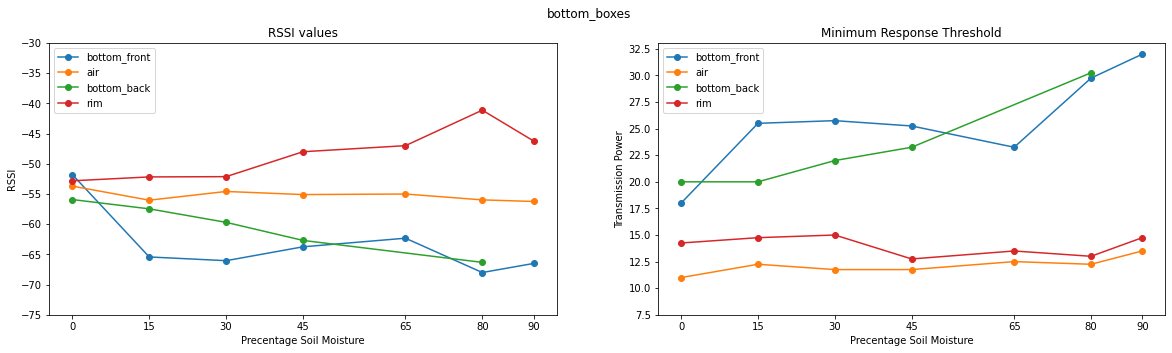

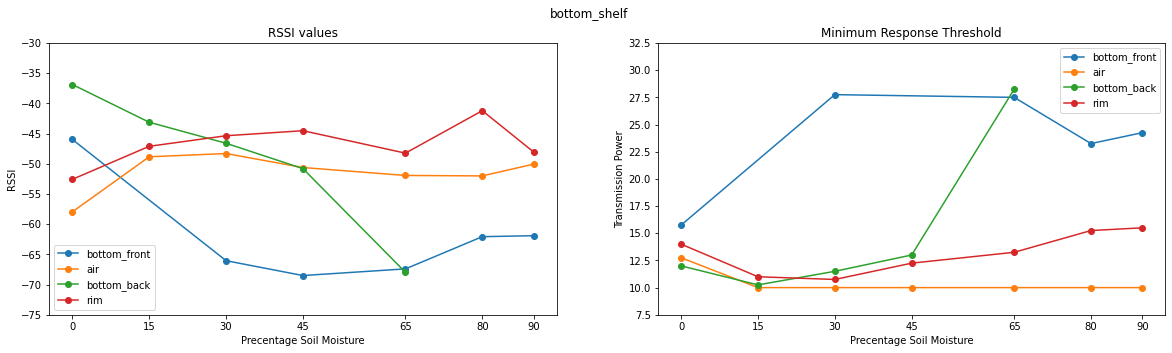

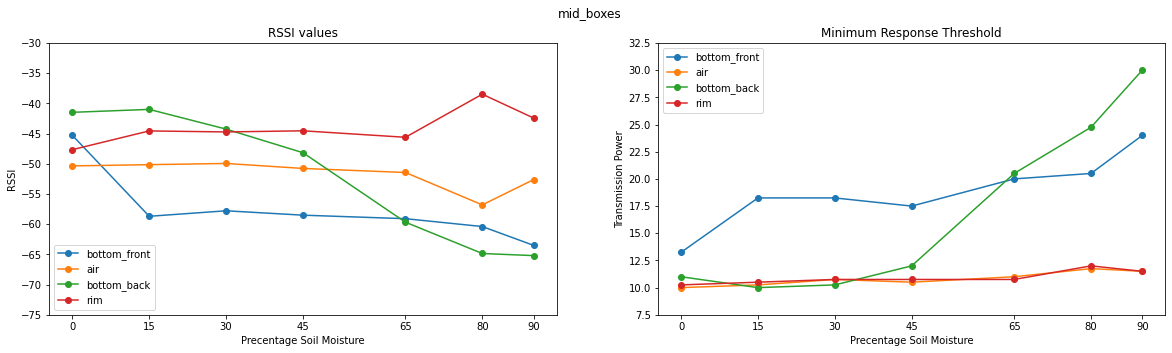

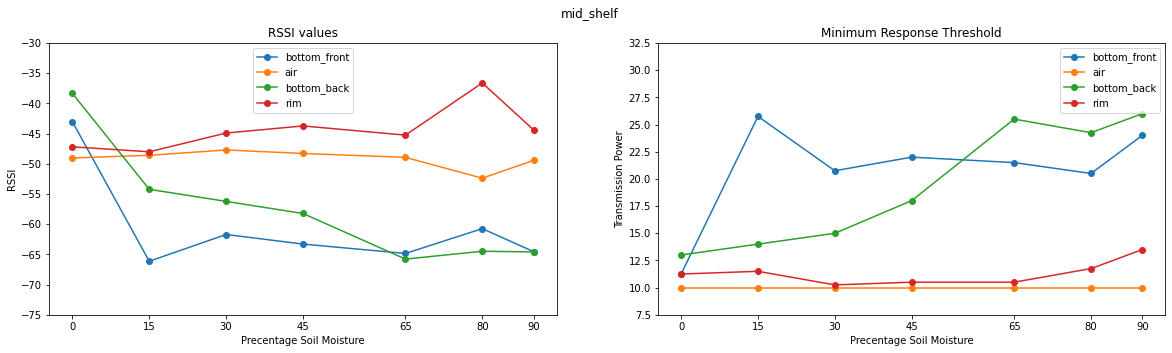

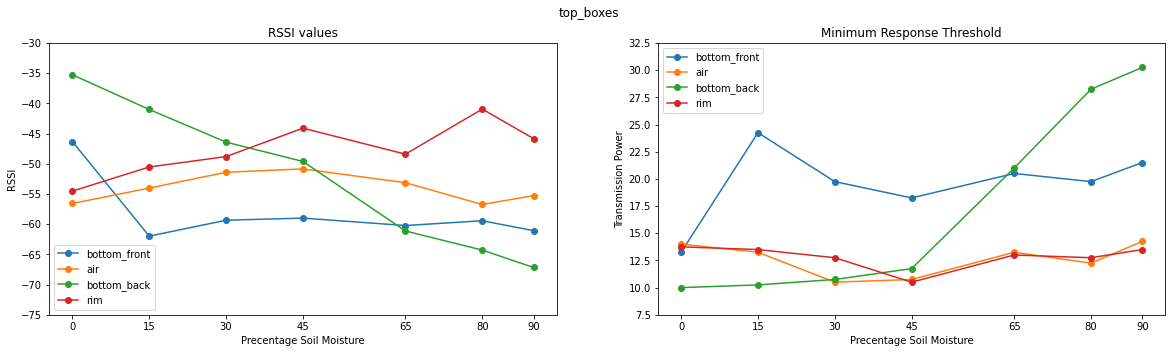

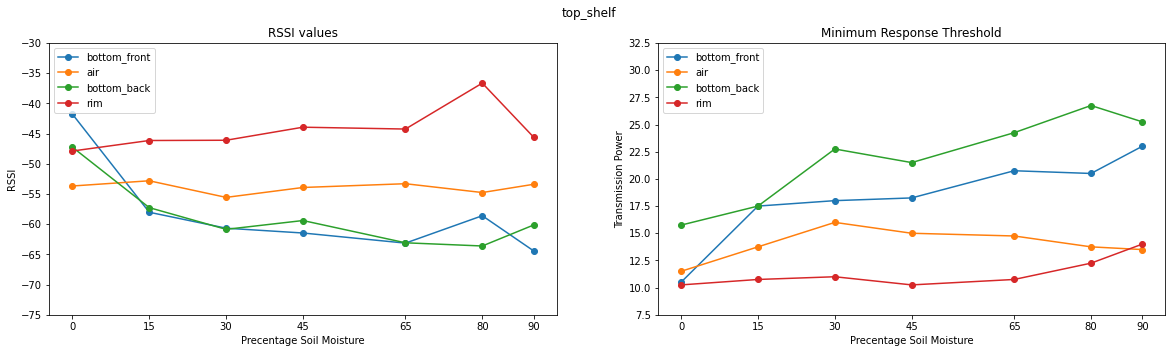

In [25]:
compiled_rssi_readings: Dict[str, dict] = defaultdict(dict)

for key in keys:
    rssi_readings: tuple = plot_rssi(key, tag_list, complete_data_new, xs)
    rssi_ys: np.ndarray = rssi_readings[0]
    mrt_ys: Dict[str, dict] = rssi_readings[1]
    mrt_xs: Dict[str, List[int]] = rssi_readings[2]
    compiled_rssi_readings[key] = {"rssi": rssi_ys, "mrt": mrt_ys, "mrt_xs": mrt_xs}


In [28]:
bottom_boxes_mrt: np.ndarray = compiled_rssi_readings["bottom_boxes"]["mrt"]
bottom_boxes_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings["bottom_boxes"][
    "mrt_xs"
]

mid_boxes_mrt: np.ndarray = compiled_rssi_readings["mid_boxes"]["mrt"]
mid_boxes_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings["mid_boxes"]["mrt_xs"]

top_boxes_mrt: np.ndarray = compiled_rssi_readings["top_boxes"]["mrt"]
top_boxes_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings["top_boxes"]["mrt_xs"]

bottom_shelf_mrt: np.ndarray = compiled_rssi_readings["bottom_shelf"]["mrt"]
bottom_shelf_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings["bottom_shelf"][
    "mrt_xs"
]

mid_shelf_mrt: np.ndarray = compiled_rssi_readings["mid_shelf"]["mrt"]
mid_shelf_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings["mid_shelf"]["mrt_xs"]

top_shelf_mrt: np.ndarray = compiled_rssi_readings["top_shelf"]["mrt"]
top_shelf_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings["top_shelf"]["mrt_xs"]

mrt_boxes_positions_ys = [bottom_boxes_mrt, mid_boxes_mrt, top_boxes_mrt]

mrt_shelf_positions_ys = [bottom_shelf_mrt, mid_shelf_mrt, top_shelf_mrt]

mrt_boxes_positions_xs = [bottom_boxes_mrt_xs, mid_boxes_mrt_xs, top_boxes_mrt_xs]

mrt_shelf_positions_xs = [bottom_shelf_mrt_xs, mid_shelf_mrt_xs, top_shelf_mrt_xs]

tag_locs = [
    # ("bottom_front", "air", "bot_f - air"),
    ("bottom_back", "air", "bot_b - air"),
    # ("bottom_front", "rim", "bot_f - rim"),
    ("bottom_back", "rim", "bot_b - rim"),
]

positions = [
    "Bottom {}",
    "Middle {}",
    "Top {}",
]


In [40]:
def plot_dmrts(
    mrt_boxes_ys, mrt_boxes_xs, tag_locs, positions, mrt_shelf_ys, mrt_shelf_xs
):
    num_plots = len(mrt_boxes_ys)
    _, axes = plt.subplots(num_plots, 2, figsize=(20, 15))

    i = 0
    for box_ys, shelf_ys, box_xs, shelf_xs in zip(
        mrt_boxes_ys, mrt_shelf_ys, mrt_boxes_xs, mrt_shelf_xs
    ):
        # boxes first
        box_diff_collection = []
        for loc1, loc2, lab in tag_locs:
            ydiff = []
            x_final = []
            for x in xs:
                if (
                    x in box_xs[tag_info[loc1]["EPC-96"]]
                    and x in box_xs[tag_info[loc2]["EPC-96"]]
                ):
                    loc1_idx = box_xs[tag_info[loc1]["EPC-96"]].index(x)
                    loc2_idx = box_xs[tag_info[loc2]["EPC-96"]].index(x)
                    diff = (
                        box_ys[tag_info[loc1]["EPC-96"]][loc1_idx]
                        - box_ys[tag_info[loc2]["EPC-96"]][loc2_idx]
                    )
                    ydiff.append(diff)
                    x_final.append(x)
            assert len(ydiff) == len(x_final), "Length of y and x not same"
            box_diff_collection.append((x_final, ydiff, lab))

        shelf_diff_collection = []
        for loc1, loc2, lab in tag_locs:
            ydiff = []
            x_final = []
            for x in xs:
                if (
                    x in shelf_xs[tag_info[loc1]["EPC-96"]]
                    and x in shelf_xs[tag_info[loc2]["EPC-96"]]
                ):
                    loc1_idx = shelf_xs[tag_info[loc1]["EPC-96"]].index(x)
                    loc2_idx = shelf_xs[tag_info[loc2]["EPC-96"]].index(x)
                    diff = (
                        shelf_ys[tag_info[loc1]["EPC-96"]][loc1_idx]
                        - shelf_ys[tag_info[loc2]["EPC-96"]][loc2_idx]
                    )
                    ydiff.append(diff)
                    x_final.append(x)
            assert len(ydiff) == len(x_final), "Length of y and x not same"
            shelf_diff_collection.append((x_final, ydiff, lab))

        for box_plot, shelf_plot in zip(box_diff_collection, shelf_diff_collection):
            axes[i][0].plot(box_plot[0], box_plot[1], marker='o', label=box_plot[2])
            axes[i][1].plot(shelf_plot[0], shelf_plot[1], marker='o', label=shelf_plot[2])

        axes[i][0].set_title(positions[i].format("Boxes"))
        axes[i][0].set_xticks(xs)
        axes[i][0].set_yticks(np.arange(-5, 25, 2.5))
        axes[i][0].set_xlabel("Precentage Soil Moisture")
        axes[i][0].set_ylabel("Differential Minimum Response Threshold")
        axes[i][0].legend()
        
        axes[i][1].set_title(positions[i].format("Shelf"))
        axes[i][1].set_xticks(xs)
        axes[i][1].set_yticks(np.arange(-5, 25, 2.5))
        axes[i][1].set_xlabel("Precentage Soil Moisture")
        axes[i][1].set_ylabel("Differential Minimum Response Threshold")
        axes[i][1].legend()
        i += 1

    plt.suptitle("DMRT Plot Comparisons")


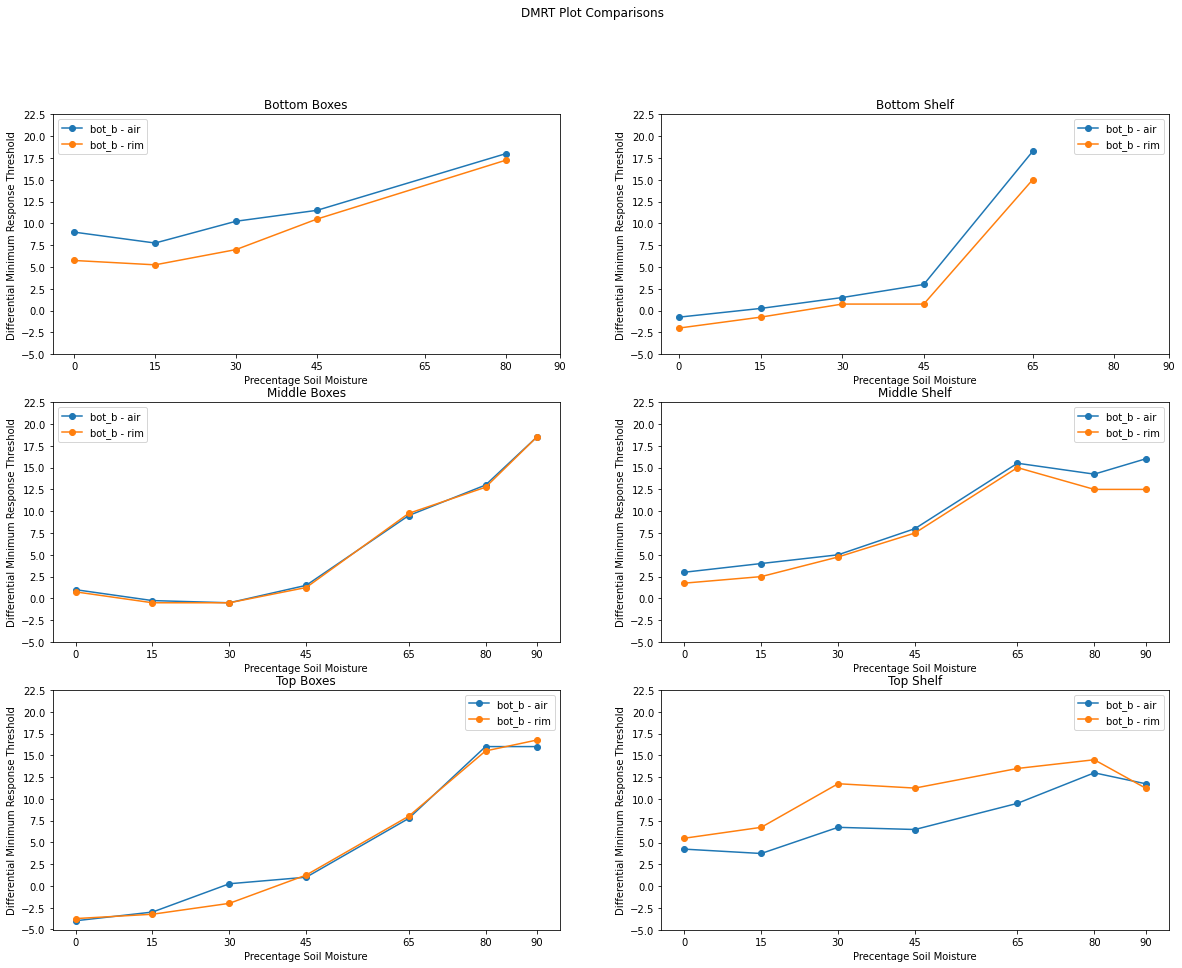

In [41]:
plot_dmrts(
    mrt_boxes_positions_ys,
    mrt_boxes_positions_xs,
    tag_locs,
    positions,
    mrt_shelf_positions_ys,
    mrt_shelf_positions_xs,
)


In [144]:
def plot_boxplot(location, tag, compare=True):
    if compare:
        location_selected1 = location + "_boxes"
        location_selected2 = location + "_shelf"
        fig, axes = plt.subplots(1, 2, figsize=(20, 10))
        x1 = []
        x2 = []
        for percent in xs:
            x1.append(
                complete_data_new[f"{percent}percent"][location_selected1]["rssi_vals"][
                    tag
                ]["rssi"]
            )
            x2.append(
                complete_data_new[f"{percent}percent"][location_selected2]["rssi_vals"][
                    tag
                ]["rssi"]
            )

        axes[0].boxplot(x1, labels=xs, showmeans=True)
        axes[0].set_title(f"Box plot for the RSSI values at {location_selected1}")
        axes[0].set_xlabel("% soil moisture")
        axes[0].set_ylabel("RSSI values")

        axes[1].boxplot(x2, labels=xs, showmeans=True)
        axes[1].set_title(f"Box plot for the RSSI values at {location_selected2}")
        axes[1].set_xlabel("% soil moisture")
        axes[1].set_ylabel("RSSI values")
    else:
        if len(location.split("_")) != 2:
            print("Give proper location when plotting only one")
            return
        x = []
        for percent in xs:
            x.append(
                complete_data_new[f"{percent}percent"][location]["rssi_vals"][tag][
                    "rssi"
                ]
            )
        fig = plt.figure(figsize=(10, 7))
        plt.boxplot(x, labels=xs, showmeans=True)
        plt.title(f"Box plot for the RSSI values at {location}")
        plt.xlabel("% soil moisture")
        plt.ylabel("RSSI values")
        plt.show()


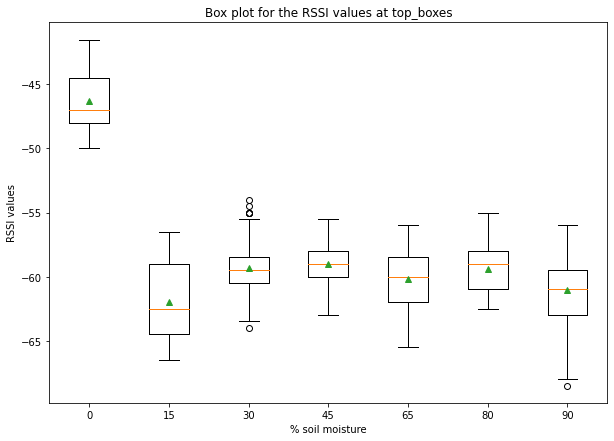

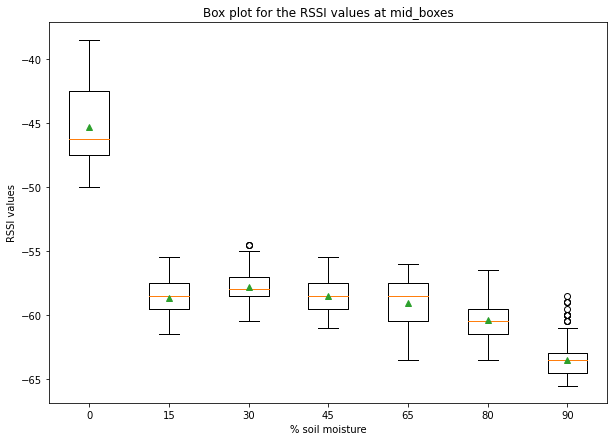

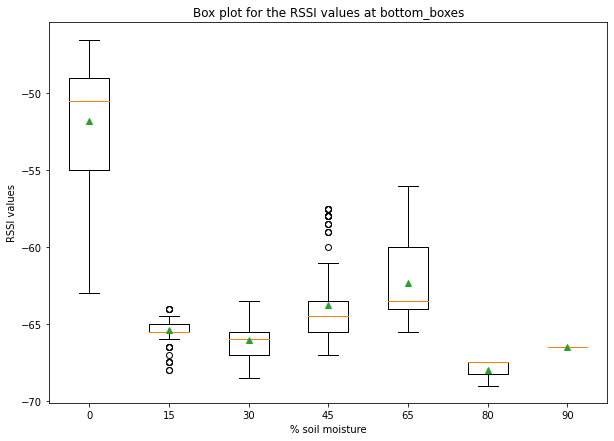

In [145]:
tag_selected = "bottom_front"
tag = tag_info[tag_selected]["EPC-96"]

plot_boxplot("top_boxes", tag, compare=False)
plot_boxplot("mid_boxes", tag, compare=False)
plot_boxplot("bottom_boxes", tag, compare=False)


In [174]:
keys_v2: List[str] = [
    "0deg",
    "30deg",
    "60deg",
    "front",
    "back",
    "left",
    "right",
    "top",
    "middle",
    "bottom",
]

moistures_v2: List[str] = ["0", "10", "25", "40"]
# keys_v2: List[str] = [
#     '0deg',
#     '30deg',
#     '60deg',
#     'front',
#     'back',
#     'left',
#     'right',
#     'top',
#     'bottom'
# ]

# moistures_v2: List[str] = [
#     '0',
#     '15',
#     '30',
#     '45',
#     '65',
#     '80',
#     '90'
# ]


In [175]:
rotation_data_new: Dict[str, dict] = v3_data_reading(
    new_data_folder, keys_v2, moistures_v2
)
print(rotation_data_new.keys())
print(rotation_data_new["0percent"].keys())
print(rotation_data_new["0percent"]["middle"].keys())
print(rotation_data_new["0percent"]["middle"]["min_Tx_power"].keys())
print(rotation_data_new["0percent"]["middle"]["rssi_vals"].keys())
# print(rotation_data_new["0percent"]["middle"]["rssi_vals"]["e280689000000001a33707c4"].keys())
# print(rotation_data_new["0percent"]["middle"]["rssi_vals"]["e280689000000001a33707c4"]["peak_rssi"])


dict_keys(['0percent', '10percent', '25percent', '40percent'])
dict_keys(['0deg', 'middle', '30deg', '60deg', 'front', 'back', 'left', 'right', 'top', 'bottom'])
dict_keys(['min_Tx_power', 'rssi_vals'])
dict_keys(['e280689000000001a2f9e48e', 'e280689000000001a2f9fb4d', 'e280689000000001a2fb6418', 'e280689000000001a2f9e49d', 'e280689000000001a2fa42ac', 'e280689000000001a2f9e47f', 'e280689000000001a33707c4'])
dict_keys([])


In [176]:
tag_ids = {
    # 'e280689000000001a2fa42ca':
    # {
    #     'tag': 'tag_1',
    #     'EPC-96': 'e280689000000001a2fa42ca',
    #     'location': 'air'
    # },
    "e280689000000001a2f9e48e": {
        "tag": "tag_2",
        "EPC-96": "e280689000000001a2f9e48e",
        "location": "rim",
    },
    "e280689000000001a33707c4": {
        "tag": "tag_3",
        "EPC-96": "e280689000000001a33707c4",
        "location": "bottom_front",
    },
    "e280689000000001a2fa42ac": {
        "tag": "tag_4",
        "EPC-96": "e280689000000001a2fa42ac",
        "location": "bottom_back",
    },
    "e280689000000001a2f9fb4d": {
        "tag": "tag_5",
        "EPC-96": "e280689000000001a2f9fb4d",
        "location": "air",
    },
    "e280689000000001a2f9e49d": {
        "tag": "tag_6",
        "EPC-96": "e280689000000001a2f9e49d",
        "location": "bottom_right",
    },
    "e280689000000001a2f9e47f": {
        "tag": "tag_7",
        "EPC-96": "e280689000000001a2f9e47f",
        "location": "bottom_left",
    },
    "e280689000000001a2fb6418": {
        "tag": "tag_8",
        "EPC-96": "e280689000000001a2fb6418",
        "location": "rim_back",
    },
}


In [177]:
tag_list_v2 = list(tag_ids.keys())
position_v2 = "middle"
xs_v2 = [0, 10, 25, 40]
print(tag_list_v2)


['e280689000000001a2f9e48e', 'e280689000000001a33707c4', 'e280689000000001a2fa42ac', 'e280689000000001a2f9fb4d', 'e280689000000001a2f9e49d', 'e280689000000001a2f9e47f', 'e280689000000001a2fb6418']


In [178]:
tag_info_v2: dict = dict()
for _, tag in enumerate(tag_list_v2):
    loc = tag_ids[tag]["location"]
    tag_info_v2[loc] = tag_ids[tag]
print(tag_info_v2)


{'rim': {'tag': 'tag_2', 'EPC-96': 'e280689000000001a2f9e48e', 'location': 'rim'}, 'bottom_front': {'tag': 'tag_3', 'EPC-96': 'e280689000000001a33707c4', 'location': 'bottom_front'}, 'bottom_back': {'tag': 'tag_4', 'EPC-96': 'e280689000000001a2fa42ac', 'location': 'bottom_back'}, 'air': {'tag': 'tag_5', 'EPC-96': 'e280689000000001a2f9fb4d', 'location': 'air'}, 'bottom_right': {'tag': 'tag_6', 'EPC-96': 'e280689000000001a2f9e49d', 'location': 'bottom_right'}, 'bottom_left': {'tag': 'tag_7', 'EPC-96': 'e280689000000001a2f9e47f', 'location': 'bottom_left'}, 'rim_back': {'tag': 'tag_8', 'EPC-96': 'e280689000000001a2fb6418', 'location': 'rim_back'}}


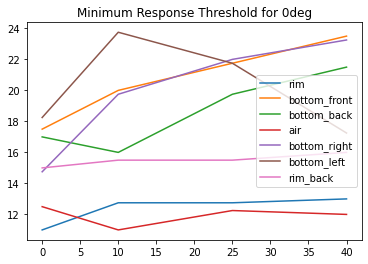

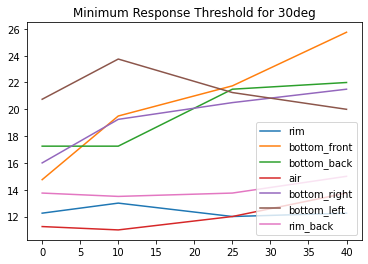

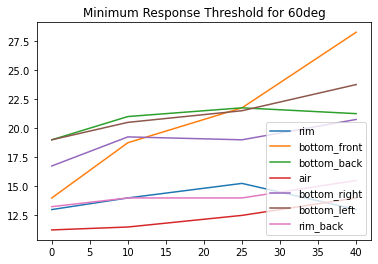

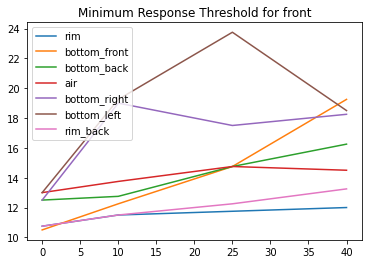

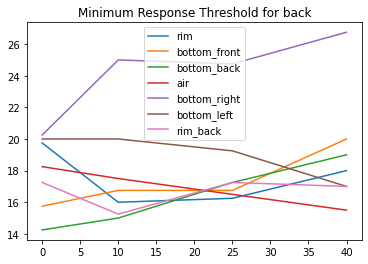

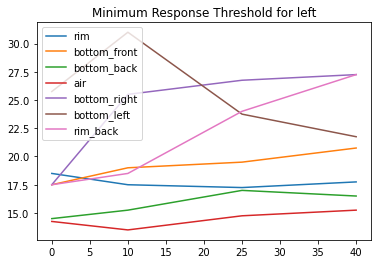

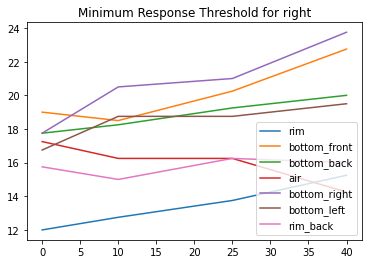

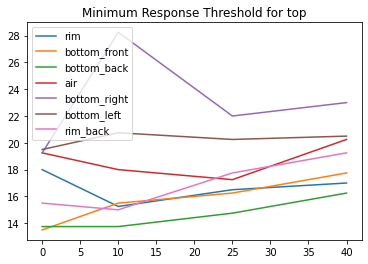

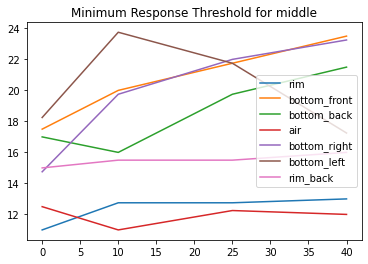

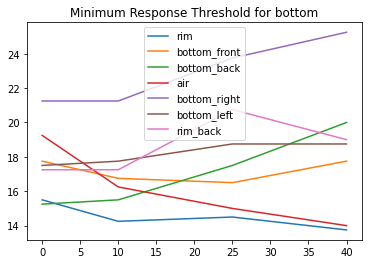

In [200]:
compiled_rssi_readings_v2: Dict[str, dict] = defaultdict(dict)

for key in keys_v2:
    rssi_readings: tuple = plot_rssi(
        key, tag_list_v2, rotation_data_new, xs_v2, plot=False, plot_mrt=True
    )
    rssi_ys: np.ndarray = rssi_readings[0]
    mrt_ys: Dict[str, dict] = rssi_readings[1]
    mrt_xs: Dict[str, List[int]] = rssi_readings[2]
    compiled_rssi_readings_v2[key] = {"rssi": rssi_ys, "mrt": mrt_ys, "mrt_xs": mrt_xs}


In [180]:
bottom_mrt: np.ndarray = compiled_rssi_readings_v2["bottom"]["mrt"]
bottom_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings_v2["bottom"]["mrt_xs"]

mid_mrt: np.ndarray = compiled_rssi_readings_v2["middle"]["mrt"]
mid_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings_v2["middle"]["mrt_xs"]

top_mrt: np.ndarray = compiled_rssi_readings_v2["top"]["mrt"]
top_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings_v2["top"]["mrt_xs"]

deg0_mrt: np.ndarray = compiled_rssi_readings_v2["0deg"]["mrt"]
deg0_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings_v2["0deg"]["mrt_xs"]

deg30_mrt: np.ndarray = compiled_rssi_readings_v2["30deg"]["mrt"]
deg30_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings_v2["30deg"]["mrt_xs"]

deg60_mrt: np.ndarray = compiled_rssi_readings_v2["60deg"]["mrt"]
deg60_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings_v2["60deg"]["mrt_xs"]

front_mrt: np.ndarray = compiled_rssi_readings_v2["front"]["mrt"]
front_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings_v2["front"]["mrt_xs"]

back_mrt: np.ndarray = compiled_rssi_readings_v2["back"]["mrt"]
back_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings_v2["back"]["mrt_xs"]

left_mrt: np.ndarray = compiled_rssi_readings_v2["left"]["mrt"]
left_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings_v2["left"]["mrt_xs"]

right_mrt: np.ndarray = compiled_rssi_readings_v2["right"]["mrt"]
right_mrt_xs: Dict[str, List[int]] = compiled_rssi_readings_v2["right"]["mrt_xs"]

############################
mrt_positions_ys = [bottom_mrt, mid_mrt, top_mrt]
mrt_positions_xs = [bottom_mrt_xs, mid_mrt_xs, top_mrt_xs]

############################
mrt_rotations_ys = [deg0_mrt, deg30_mrt, deg60_mrt]
mrt_rotations_xs = [deg0_mrt_xs, deg30_mrt_xs, deg60_mrt_xs]

############################
mrt_displacement_ys = [front_mrt, back_mrt, left_mrt, right_mrt]
mrt_displacement_xs = [front_mrt_xs, back_mrt_xs, left_mrt_xs, right_mrt_xs]

tag_locs_v2 = [
    ("bottom_front", "air", "bot_f - air"),
    ("bottom_back", "air", "bot_b - air"),
    ("bottom_front", "rim", "bot_f - rim"),
    ("bottom_back", "rim", "bot_b - rim"),
]

positions_v2_loc = [
    "Bottom {}",
    "Middle {}",
    "Top {}",
]

positions_v2_rot = [
    "0deg Rotation Middle",
    "30deg Rotation Middle",
    "60deg Rotation Middle",
]

positions_v2_disp = [
    "Front",
    "Back",
    "Left",
    "Right",
]


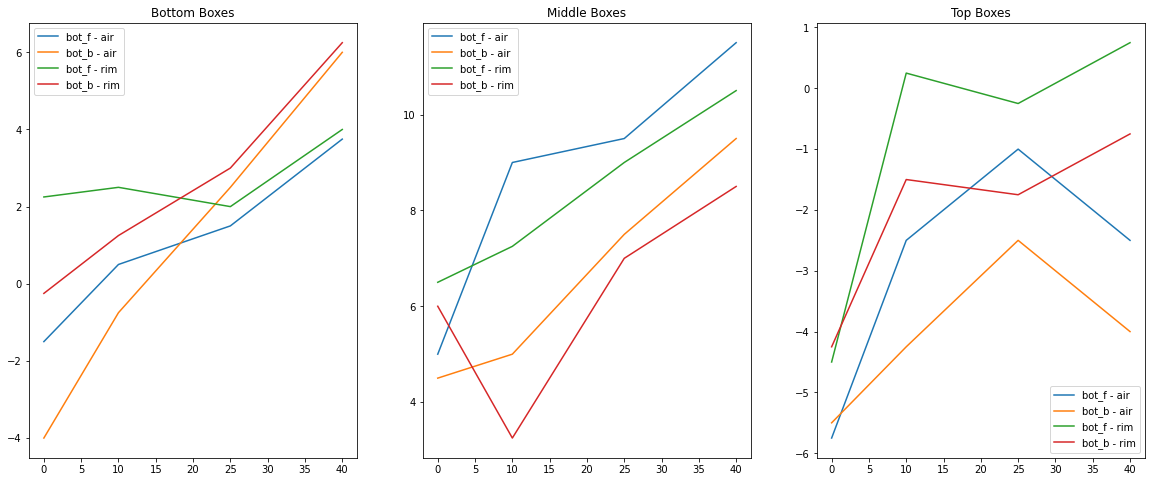

In [183]:
# Locations DMRT plots
_, axes = plt.subplots(1, 3, figsize=(20, 8))

i = 0
for location_ys, location_xs in zip(mrt_positions_ys, mrt_positions_xs):
    diff_collection = []
    for loc1, loc2, lab in tag_locs_v2:
        ydiff = []
        x_final = []
        for x in xs_v2:
            if (
                x in location_xs[tag_info_v2[loc1]["EPC-96"]]
                and x in location_xs[tag_info_v2[loc2]["EPC-96"]]
            ):
                loc1_idx = location_xs[tag_info_v2[loc1]["EPC-96"]].index(x)
                loc2_idx = location_xs[tag_info_v2[loc2]["EPC-96"]].index(x)
                diff = (
                    location_ys[tag_info[loc1]["EPC-96"]][loc1_idx]
                    - location_ys[tag_info[loc2]["EPC-96"]][loc2_idx]
                )
                ydiff.append(diff)
                x_final.append(x)
        assert len(ydiff) == len(x_final), "Length of y and x not same"
        diff_collection.append((x_final, ydiff, lab))

    for diff_values in diff_collection:
        axes[i].plot(diff_values[0], diff_values[1], label=diff_values[2])

    axes[i].set_title(positions_v2_loc[i].format("Boxes"))
    axes[i].legend()
    i += 1


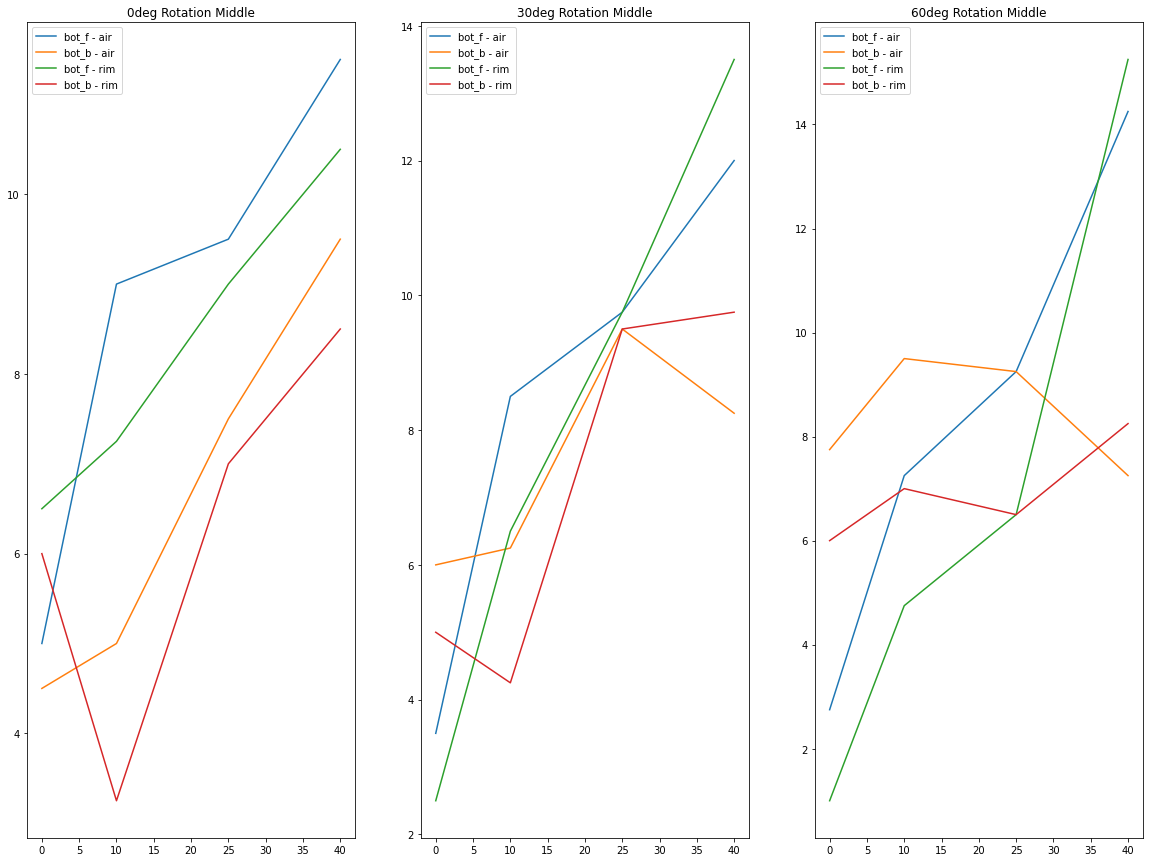

In [184]:
# Rotation DMRT plots
_, axes = plt.subplots(1, 3, figsize=(20, 15))

i = 0
for location_ys, location_xs in zip(mrt_rotations_ys, mrt_rotations_xs):
    diff_collection = []
    for loc1, loc2, lab in tag_locs_v2:
        ydiff = []
        x_final = []
        for x in xs_v2:
            if (
                x in location_xs[tag_info_v2[loc1]["EPC-96"]]
                and x in location_xs[tag_info_v2[loc2]["EPC-96"]]
            ):
                loc1_idx = location_xs[tag_info_v2[loc1]["EPC-96"]].index(x)
                loc2_idx = location_xs[tag_info_v2[loc2]["EPC-96"]].index(x)
                diff = (
                    location_ys[tag_info[loc1]["EPC-96"]][loc1_idx]
                    - location_ys[tag_info[loc2]["EPC-96"]][loc2_idx]
                )
                ydiff.append(diff)
                x_final.append(x)
        assert len(ydiff) == len(x_final), "Length of y and x not same"
        diff_collection.append((x_final, ydiff, lab))

    for diff_values in diff_collection:
        axes[i].plot(diff_values[0], diff_values[1], label=diff_values[2])

    axes[i].set_title(positions_v2_rot[i])
    axes[i].legend()
    i += 1


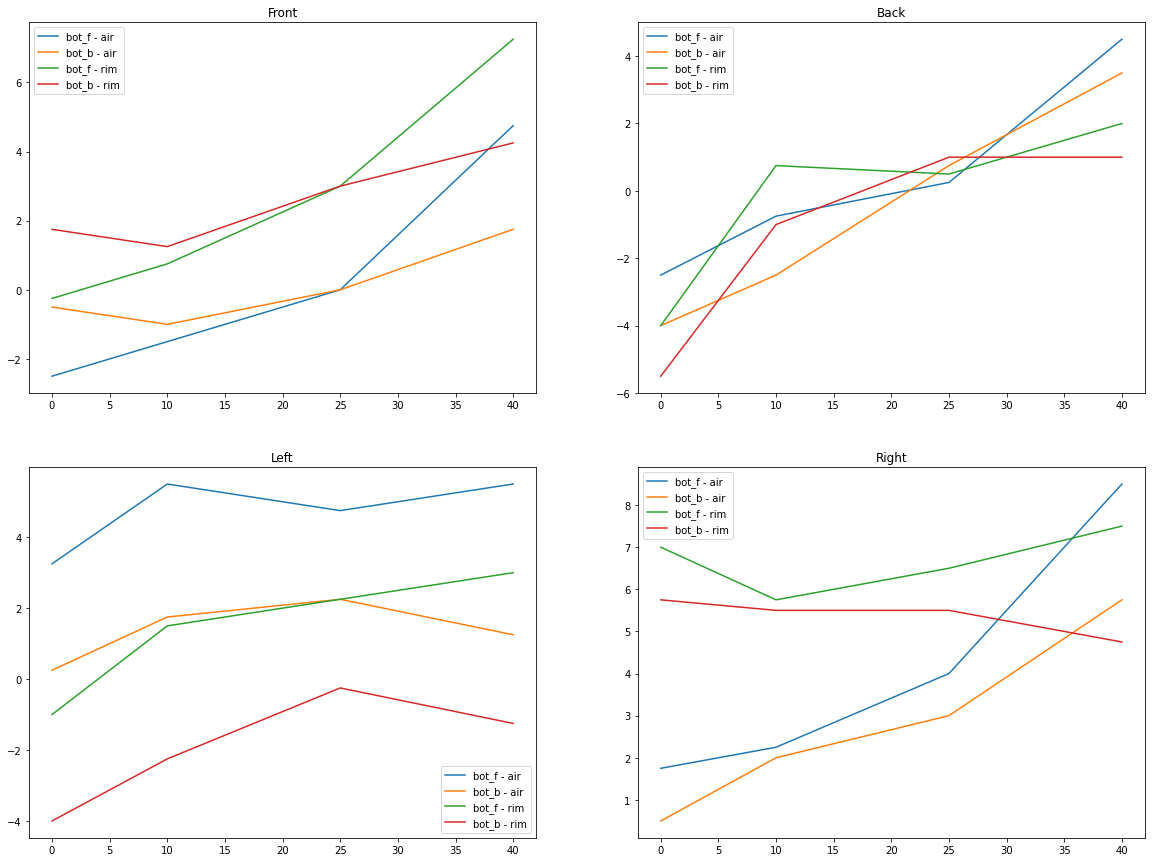

In [185]:
# displacement DMRT plots
_, axes = plt.subplots(2, 2, figsize=(20, 15))

ij_vals = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1),
]
k = 0
for location_ys, location_xs in zip(mrt_displacement_ys, mrt_displacement_xs):
    diff_collection = []
    i, j = ij_vals[k]
    for loc1, loc2, lab in tag_locs_v2:
        ydiff = []
        x_final = []
        for x in xs_v2:
            if (
                x in location_xs[tag_info_v2[loc1]["EPC-96"]]
                and x in location_xs[tag_info_v2[loc2]["EPC-96"]]
            ):
                loc1_idx = location_xs[tag_info_v2[loc1]["EPC-96"]].index(x)
                loc2_idx = location_xs[tag_info_v2[loc2]["EPC-96"]].index(x)
                diff = (
                    location_ys[tag_info[loc1]["EPC-96"]][loc1_idx]
                    - location_ys[tag_info[loc2]["EPC-96"]][loc2_idx]
                )
                ydiff.append(diff)
                x_final.append(x)
        assert len(ydiff) == len(x_final), "Length of y and x not same"
        diff_collection.append((x_final, ydiff, lab))

    for diff_values in diff_collection:
        axes[i][j].plot(diff_values[0], diff_values[1], label=diff_values[2])

    axes[i][j].set_title(positions_v2_disp[k])
    axes[i][j].legend()
    k += 1
